# **Comparative analysis of FINBERT, BERT and traditional models(TFIDF , SVM, LOGISTIC REGRESSION) of classification**

We are conducting a comaparative analysis of FINBERT, BERT and traditional models viz., logistic regression and support vector classification to find the best model for identifying and predicting the sentiment of text. 

We will start by looking at the Sentences_50Agree.csv file (renamed as data1.csv) , which is a sentiment dataset of sentences from financial news consisting of 4840 sentences from English language financial news categorised by sentiment (positive, negative, and neutral). It is divided by agreement rate of 5-8 annotators. We are performing sentiment analysis to aid the stock investment decision making by identifying the sentiment of the financial phrase. 

If the sentiment of the phrase is positive it means that an invester can consider investing in stock market, if negative then invester must refrain investing and if sentiment is neutral then further investigation is suggested.


In [ ]:
                # installing libraries (TRANSFORMERS for BERT) 
!pip install --upgrade transformers==4.28.0
#note: when uninstalling existing transformers it may ask to answer y/n. Input response y to proceed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.8 MB/s eta 0:00:00


In [ ]:

!pip install numpy
!pip install torch==1.7.1
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.8 MB/s eta 0:00:00


**transformers**: This package provides an interface pretrained BERT and FINBERT models to perform sentiment analysis.  

**numpy**: It is a powerful tool to deal with data preprocessing, handling input arrays, multidimensional data and performs mathematical computations efficiently.

**torch**: Also known as PyTorch, is a open-source machine learning library. AS BERT and FINBERT models are built using deep learning architechture, PyTorch is commonly used in these models.

**scikit-learn**: provides tools and algorithms in machine learning and helps in tasks like data preprocessing, feature extraction, model evaluation, and classification and also offers convinient APIs.


**datsets**: The 'datasets' library is a Python package that provides an efficient way to work with various datasets, including text and image datasets. It provides a standardized interface for loading and processing datasets, making it easier to work with different datasets and models.

## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd 
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

*Note: the following code is for demonstration purpose. Please use GPU for fast inference on large scale dataset.*

In [ ]:
torch.cuda.is_available()      # Check if a CUDA-capable GPU is available

True

### load dataset

## Importing and loading dataset

Function drive.mount() from *'drive'* package is used to gain access to google drive. A window pops on the screen which asks for users permission to gain access to drive. One must make sure they have their dataset uploaded on google drive in folder name 'BERT'.

 Dataset is imported using pd.read_csv() function.

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df = df[~df.Sentiment.str.contains('\|')]  # Filtering the DataFrame 'df' to remove rows where the 'category' column contains '|'
df = df[df.Sentiment != 'nocode']   ## Filtering the DataFrame 'df' to remove rows where the 'category' column equals 'nocode'

#get value count for each class
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [ ]:
#get unique values    # JUST TO CHECK UNIQUE LABELS IN DATASET
possible_labels = df.Sentiment.unique()  ## Creating an array 'possible_labels' that contains all unique values in the 'category' column of the DataFrame 'df
possible_labels

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
label_dict = {}      # Creating an empty dictionary 'label_dict' to store the label-index pairs
for index, possible_label in enumerate(possible_labels):       # Iterating over each label in 'possible_labels'
    label_dict[possible_label] = index   # Adding the label-index pair to the 'label_dict' dictionary

In [ ]:
df['label'] = df.Sentiment.replace(label_dict)  # Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
df

,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,0
3,According to the Finnish-Russian Chamber of Co...,neutral,2
4,The Swedish buyout firm has sold its remaining...,neutral,2
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,1
5838,Nordic Walking was first used as a summer trai...,neutral,2
5839,"According shipping company Viking Line , the E...",neutral,2
5840,"In the building and home improvement trade , s...",neutral,2


## Preprocessing: Cleaning, removing stopwords, lemmatization

Next step is cleaning the data to make it suitable to load it in our models. This is an essential step as feeding raw data will not give us good results.

In [ ]:
df = df[~df.Sentiment.str.contains('\|')]  # Filtering the DataFrame 'df' to remove rows where the 'category' column contains '|'
df = df[df.Sentiment != 'nocode']   ## Filtering the DataFrame 'df' to remove rows where the 'category' column equals 'nocode'

#get value count for each class
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In this step we get rid of all rows which have '|', null values in category column as these are considered irrelevant

In [ ]:
#get unique labels/factors in category column
possible_labels = df.Sentiment.unique() 
possible_labels

array(['positive', 'negative', 'neutral'], dtype=object)

There are 3 unique labels, 'neutral', 'negative', 'positive', and stored in variable 'possible_labels'

In [ ]:
label_dict = {}      # Creating an empty dictionary 'label_dict' to store the label-index pairs
for index, possible_label in enumerate(possible_labels):       # Iterating over each label in 'possible_labels'
    label_dict[possible_label] = index   # Adding the label-index pair to the 'label_dict' dictionary

Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
# Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary
df['label'] = df.Sentiment.replace(label_dict)  

In [ ]:
df      # labels for neutral is 0 , for negative is 1 , for positive is 2

,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,0
3,According to the Finnish-Russian Chamber of Co...,neutral,2
4,The Swedish buyout firm has sold its remaining...,neutral,2
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,1
5838,Nordic Walking was first used as a summer trai...,neutral,2
5839,"According shipping company Viking Line , the E...",neutral,2
5840,"In the building and home improvement trade , s...",neutral,2


In the above three cells first we assign an interger value to each label to make it readable for the model. 
The label values are defined as follows: 
**neutral = 0 , negative = 1 , positive = 2**
A new column 'label' is added to dataset 'df' to assign label corresponding to the value in category column. 'label_dict' takes care of this pairing. 

In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

In [ ]:
# Converting % into percent
df['Sentence'] = df['Sentence'].str.replace('%', 'percent')

All the '%' symbols are now converted into text 'percent' using str.replace() function.



---

Another way to replace a symbol is explained in next cell. We can define a function to identify the regular expression in the text (here sentence) and its replacement text and then use apply() function to replace the pattern in desired column.

In [ ]:
import re
# Define a function to perform the conversion
def convert_usd(sentence):
    return re.sub(r'\$', 'usd ', sentence)

# Apply the function to the 'Sentence' column
df['Sentence'] = df['Sentence'].apply(convert_usd)

Since '$' represents currency US dollars we can convert it to 'usd' which is widely used. A function 'convert_usd' is defined to identify pattern using regular expression *r'\$'* and converted to 'usd' using 'apply()' function

In [ ]:
#identifying any html tags in the data
def has_html_tags(text):
    pattern = r"<[^>]+>"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
html_tags = df['Sentence'].apply(has_html_tags)
rows_with_html_tags = df[html_tags == True]
print(rows_with_html_tags)


                                               Sentence Sentiment  label
4053  usd TSLA <STUDY the CHARTS> Pullback_Time http...  negative      1


Any html tags <> in the dataset are identified by defining has_html_tags function. re.search() function will search for pattern * r"<[^>]+>" * and then return True is pattern is identified else False. 

apply() function is used to check in 'sentence' column in dataset 'df' and these values are stored in rows_with_html_tags variable. 

Using print() we see that the dataframe is empty and there are no html tags identified in the dataset 



---


To identify any URL's or web addresses (starting with "http://", "https://", or "www.")  in the dataframe we define function has_urls such that if re.search () function identifies pattern = r"\b(https?://|www\.)\S+\b" in the text it will return value True or False otherwise. 

apply() function is used to check any URL's in 'sentence' column in dataset 'df' and these values are stored in urls_present variable. 

print() function shows rows having URL's.

In [ ]:
# Define a function to check for URLs in a text
def has_urls(text):
    pattern = r"\b(https?://|www\.)\S+\b"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
urls_present = df['Sentence'].apply(has_urls)

# Print the rows that contain URLs
print(df[urls_present])


                                               Sentence Sentiment  label
11    usd SAP Q1 disappoints as #software licenses d...  negative      1
16    usd MSFT SQL Server revenue grew double-digit ...  positive      0
26    Costco: A Premier Retail Dividend Play https:/...  positive      0
64    RT @andrewnyquist Chartology: Yahoo: http://st...  positive      0
65    Most bullish stocks on Twitter during this dip...  positive      0
...                                                 ...       ...    ...
5796  H1 '08 H1 '07 Q2 '08 Q2 '07 in mln euro , unle...   neutral      2
5798  usd SPY usd MITK fast 56pc dive http://stks.co...  negative      1
5802  Reuters: Green Mountain revenue misses, shares...  negative      1
5808  usd QCOM The indicator RSI is over 50, which s...  positive      0
5836  Daily Mail parent company in talks with potent...  positive      0

[279 rows x 3 columns]


In [ ]:
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r"\b(https?://|www\.)\S+\b", '', text)

# Remove URLs using the pattern
df['Sentence'] = df['Sentence'].apply(remove_between_square_brackets)

Now that URL's are iodentified in the data, we remove them by defining a function remove_between_square_brackets to identify the pattern and replacing it with empty string. URL's are effectively removed from 'sentence' column of 'df'  dataframe.

In [ ]:
# printed row 4140 to verify the removal of URL's and similar patterns
df.loc[4140]

Sentence     The development of the technological park , wh...
Sentiment                                              neutral
label                                                        2
Name: 4140, dtype: object

In [ ]:
#importing phonenumbers package to identify any phone numbers in the dataframe
!pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 67.0 MB/s eta 0:00:00


we define a function has_phone_number and in this using the PhoneNumberMatcher() function in 'phonenumbers' package we identify any phone numbers in the text and return True if phone number is identified or False otherwise.

In dataframe df phone numbers are identified in 'sentence' column using apply() function and then assigned to phone_numbers varible. 

Output is printed using print() function and we see that there are phone numbers in the dataframe.

In [ ]:
#Importing phonenumbers package

import phonenumbers

# Function to check if a text contains a phone number
def has_phone_number(text):
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        return True
    return False

# Apply the function to the 'Sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]
print(rows_with_phone_numbers)

                                               Sentence Sentiment  label
254   SAMPO PLC Jarmo Salonen Head of Investor Relat...   neutral      2
288   POYRY PLC Additional information by : Heikki M...   neutral      2
1160  schwalm ( at ) outotec.com Eila Paatela , Vice...   neutral      2
1551  Complete name of shareholder : Otto Henrik Ber...   neutral      2
1708  POYRY PLC Additional information by : Martin K...   neutral      2
2269  A replay will be available until 27 October 20...   neutral      2
3020  Helsinki on October 22 , 2008 SSH COMMUNICATIO...   neutral      2
3156  rosendal at outotec.com Eila Paatela , Vice Pr...   neutral      2
3307  Aldata Solution Oyj Bertrand Sciard President ...   neutral      2
3596  Aldata Solution Oyj Thomas Hoyer CFO More info...   neutral      2
4285  Conference Call To participate via a conferenc...   neutral      2
4907  Shareholder 's full name and ID code : - Petri...   neutral      2


In [ ]:
# Define the regular expression pattern for phone numbers
phone_number_pattern = r'\+\d+(?: \d+)+'

# Function to extract phone numbers from text
def extract_phone_numbers(text):
    phone_numbers = []
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        phone_number = phonenumbers.format_number(match.number, phonenumbers.PhoneNumberFormat.E164)
        phone_numbers.append(phone_number)
    return phone_numbers

# Apply the function to the 'sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]

# Apply the function to extract phone numbers and store in a new column
df['ExtractedPhoneNumbers'] = df['Sentence'].apply(extract_phone_numbers)

# Remove the extracted phone numbers from the 'sentence' column
df['Sentence'] = df['Sentence'].replace(phone_number_pattern, '', regex=True)


In [ ]:
#drop 'ExtractedPhoneNumbers' column from dataset because it is redundant

df = df.drop('ExtractedPhoneNumbers', axis=1)

As we need to remove the phone numbers from the dataset, we assign the regular expression r'\+\d+(?: \d+)+' to variable phone_number_pattern. 

We define a function extract_phone_numbers to identify and extract phone numbers from the text and replace with an empty string. 

Using apply() we extract these phone numbers to new column 'ExtractedPhoneNumbers' in dataframe df and then using drop() function we drop this redundant column.



---


To improve the accuracy of the model results we convert all numbers to text and also see words like 'm','mn', meaning million and 'b', 'bn' meaning billion and replace these using str.replace() function.

We installed and imported num2words package to convert numbers into text form. The function convert_numbrs_to_words takes an input and converts any numbers in the text into text using corresponding representation in num2words package.

 It does this by splitting the text into words, checking if each word can be converted to a float number after removing commas, and if so, converting it to words using num2words. 
 
 If a word cannot be converted to a number, it is appended to the list of words as is. Finally, the function joins the modified words back into a single string and returns it.

 Using apply() function we convert all possible numbers in column 'sentence' of dataframe 'df' into its text representation 



In [ ]:
!pip install num2words
from num2words import num2words

#Define function to convertnumbers (decimal i.e. float and integers) to text
def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        try:
            number = float(word.replace(',', ''))
            words.append(num2words(number))
        except ValueError:
            words.append(word)
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(convert_numbers_to_words)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=6a11a546b9543f33d3f2cc7d34393193dadab7715e69c630fe3cc55a1e3244e8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
# replace 'm', 'mn' as 'million' and 'b','bn' as billion
df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')

<ipython-input-29-2103e7c08650>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
<ipython-input-29-2103e7c08650>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
<ipython-input-29-2103e7c08650>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
<ipython-input-29-2103e7c08650>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')


In [ ]:
df

,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,0
1,"usd ESI on lows, down usd one point five to us...",negative,1
2,"For the last quarter of two thousand and ten ,...",positive,0
3,According to the Finnish-Russian Chamber of Co...,neutral,2
4,The Swedish buyout firm has sold its remaining...,neutral,2
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,1
5838,Nordic Walking was first used as a summer trai...,neutral,2
5839,"According shipping company Viking Line , the E...",neutral,2
5840,"In the building and home improvement trade , s...",neutral,2


Enitre text in column'sentence' of dataframe 'df' is converted into lower case. This is conducted to achieve text normalization and improve generalization.

As we are fine-tuning the pre-trianed models this will ensure consistency in the results and also reduce noise in the data.

In [ ]:
#converting data to lower case
df['Sentence'] = df['Sentence'].str.lower()


The regular expression pattern `[^\w\s\.-]` matches any character that is not a word character (`\w`), whitespace character (`\s`), period (`.`), or hyphen (`-`). It will remove all punctuation marks and symbols except for the period and hyphen from the 'sentence' column in the DataFrame `df`.

The specific punctuation marks and symbols that will be removed include:
- Commas `,`
- Exclamation marks `!`
- Question marks `?`
- Apostrophes `'`
- Quotation marks `"`
- Parentheses `()`
- Brackets `[]`
- Braces `{}`
- Ampersands `&`
- Dollar signs `$`
- Percent signs `%`
- Forward slashes `/`
- Backslashes `\`
- Colons `:`
- Semicolons `;`
- Plus signs `+`
- Minus signs `-` (except when used as a hyphen within a word)
- Asterisks `*`
- Equal signs `=`
- At signs `@`
- Hashtags `#`
- Underscores `_`
- Tildes `~`
- Carets `^`
- Vertical bars `|`
- Less-than signs `<`
- Greater-than signs `>`

Note that this is not an exhaustive list of all possible punctuation marks and symbols, but it covers the most common ones.

In [ ]:
# Define the regular expression pattern to match punctuation excluding decimal point and hyphen
pattern = r"[^\w\s\.-]"

# Remove punctuation using the pattern
df['Sentence'] = df['Sentence'].str.replace(pattern, "")


<ipython-input-32-43d6bb4d93a8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(pattern, "")


**"punkt"**: This dataset is downloaded from the Natural Language Toolkit (nltk) library. This dataset contains pre-trained tokenizers for various languages. Once downloaded, these tokenizers can be used to tokenize text into words, sentences, etc.

**stopwords**: Downloading 'stopwords' allows removal of redundant words i.e. commonly occuring words (e.g., "the," "is," "and") from the sentences in dataset. Also we can create or include other words, symbols, special characters that are not meaningful in this corpus. They can be included in the corpus using 'set(stopwords).union(set())' code snippet.

**WordNet**: WordNet corpus from the Natural Language Toolkit (NLTK) library, is a lexical database that organizes words into groups based on their meanings and relationships with other words in the English language.

In [ ]:
import nltk  
#Downloading 'punkt'  
nltk.download('punkt')     
 # Downloading the 'stopwords' corpus       
nltk.download('stopwords') 
#Downloading 'WordNet' corpus
nltk.download('wordnet')   
# Importing the 'stopwords' corpus from nltk
from nltk.corpus import stopwords 

# Creating a variable 'stop_words' containing the default English stopwords
stop_words = stopwords.words('english')   

#Applying a lambda function to the 'sentence' column of the DataFrame 'df' to remove stopwords from each sentence
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,Sentence,Sentiment,label
0,geosolutions technology leverage benefon gps s...,positive,0
1,usd esi lows usd one point five usd two point ...,negative,1
2,last quarter two thousand ten componenta net s...,positive,0
3,according finnish-russian chamber commerce maj...,neutral,2
4,swedish buyout firm sold remaining twenty-two ...,neutral,2
...,...,...,...
5837,rising costs forced packaging producer huhtama...,negative,1
5838,nordic walking first used summer training meth...,neutral,2
5839,according shipping company viking line eu deci...,neutral,2
5840,building home improvement trade sales decrease...,neutral,2


**Lemmatization** is the process of reducing a word to its base or dictionary form, which helps in reducing the number of unique words in the text data thereby reducing the dimensionality of the problem.This code uses the 'WordNetLemmatizer' from the 'NLTK' package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'. 
Lemmatization is performed on each word in the sentence by first tokenizing the sentence using the 'nltk.word_tokenize()' function and then applying lemmatization on each token using the lemmatize function from the 'WordNetLemmatizer'. The result of lemmatization is then joined back into a sentence by performing a join using 'join()' function.

In [ ]:
#Lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'.

from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()
df['Sentence']=df['Sentence'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

Lemmatization has been performed on 'sentence' column of dataframe 'df' 

In [ ]:
df = df.dropna(how='any')

After removing stopwords and other patterns we drop rows with missing values. These rows do not contribute to our analysis and are considered noise. This operation is performed using 'dropna()' function.The how='any' parameter specifies that a row should be dropped if any of its values are empty.

After carrying out all cleaning dataset looks fairly clean and ready to use for further analysis. 

## Exploratory Data Analysis

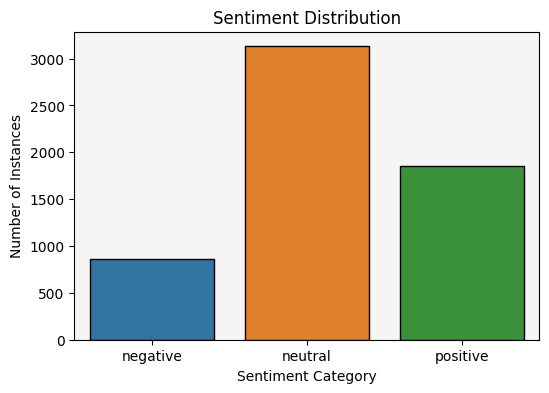

In [ ]:

# Disable grid lines
plt.rcParams["axes.grid"] = False

# Set the grid color to light blue
plt.rcParams["axes.facecolor"] = "whitesmoke"

# Group the data by "Category" and count the instances
category_counts = df.groupby("Sentiment").size().reset_index(name="Count")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Sentiment", y="Count", data=category_counts, edgecolor="black")

# Add title and labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Instances")

# Show the plot
plt.show()

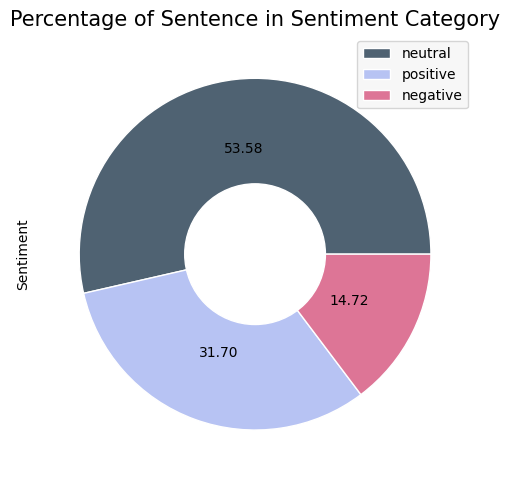

In [ ]:
# Count the values of each category
category_counts = df.Sentiment.value_counts()

# Get the labels in the correct order
labels = category_counts.index.tolist()

colors = ['#4F6272', '#B7C3F3', '#DD7596']
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
category_counts.plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, 
                     wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=colors)

# Pass the labels in the correct order to the legend
ax1.legend(labels=labels)

central_circle = plt.Circle((0, 0), 0.4, color='white')
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Percentage of Sentence in Sentiment Category', size=15)
plt.tight_layout()
plt.savefig('/content/donut_chart.png', dpi=300)
plt.show()

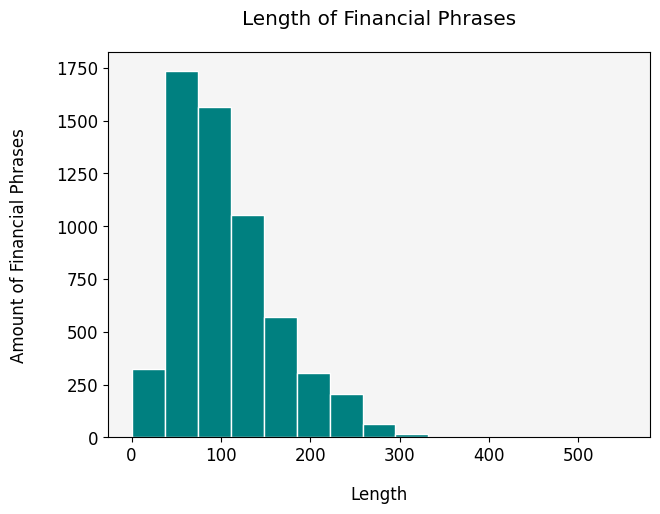

In [ ]:
# Length of Financial Phrases
df["Length"] = df["Sentence"].astype(str).apply(len)
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (7,5), edgecolor="white")
plt.title("Length of Financial Phrases", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Financial Phrases",labelpad = 20)
plt.savefig('/content/length_of_Financial Phrases_1.png', dpi=300)
plt.show()

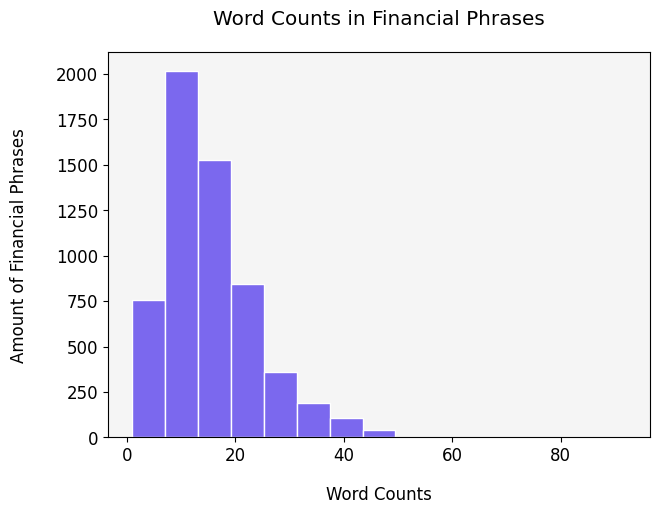

In [ ]:
#Word counts
df["Word Counts"] = df["Sentence"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "MediumSlateBlue", figsize = (7,5), edgecolor="white")
plt.title("Word Counts in Financial Phrases", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Financial Phrases", labelpad = 20)
plt.savefig('/word_counts_1.png', dpi=300)
plt.show()

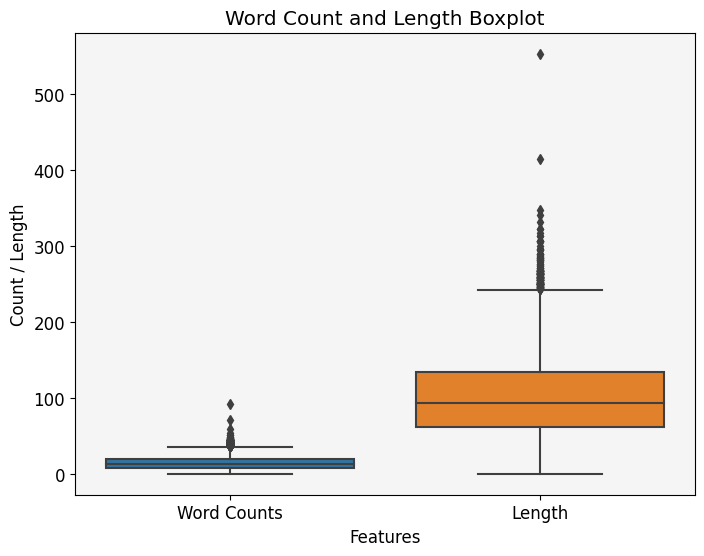

In [ ]:
#Boxplot of word counts and length
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Word Counts', 'Length']])
plt.title("Word Count and Length Boxplot")
plt.xlabel("Features")
plt.ylabel("Count / Length")
plt.show()

In [ ]:
# Print summary statistics
word_count_stats = df['Word Counts'].describe()
print("Word Count Statistics:")
print(word_count_stats)

# Print summary statistics
length_stats = df['Length'].describe()
print("Length Statistics:")
print(length_stats)

Word Count Statistics:
count    5842.000000
mean       15.740329
std         8.396434
min         1.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        92.000000
Name: Word Counts, dtype: float64
Length Statistics:
count    5842.000000
mean      105.471243
std        56.486153
min         1.000000
25%        63.000000
50%        94.000000
75%       135.000000
max       553.000000
Name: Length, dtype: float64


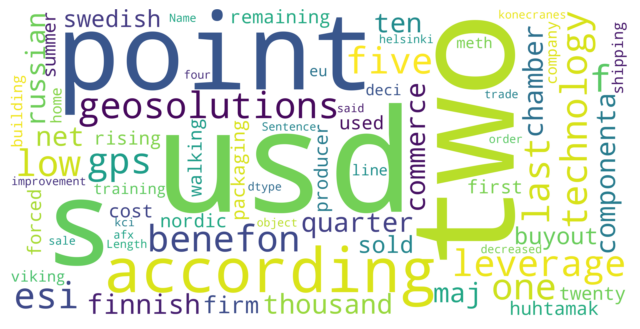

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize

#WordCloud
wc= WordCloud(background_color="white",random_state=1, max_words=2000, width = 3000, height = 1500).generate(str(df["Sentence"]))
plt.figure(figsize = (8,5))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig('/content/wordcloud_1.png', dpi=300)
plt.show()

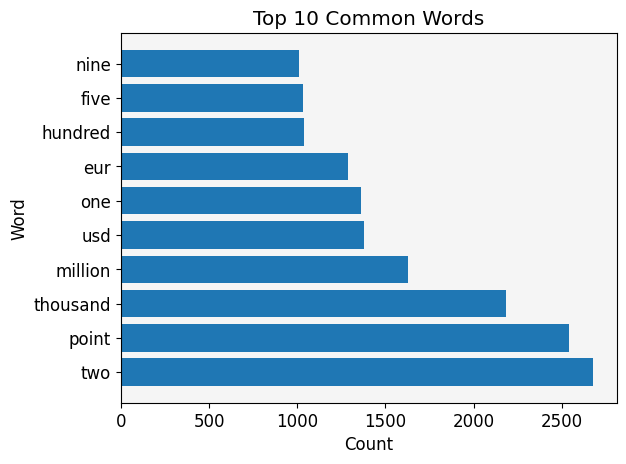

In [ ]:
# Create a CountVectorizer object to extract words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each word
bigram_counts = X.sum(axis=0)

# Get the top 10 words and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 words and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 10 Common Words")
plt.show()


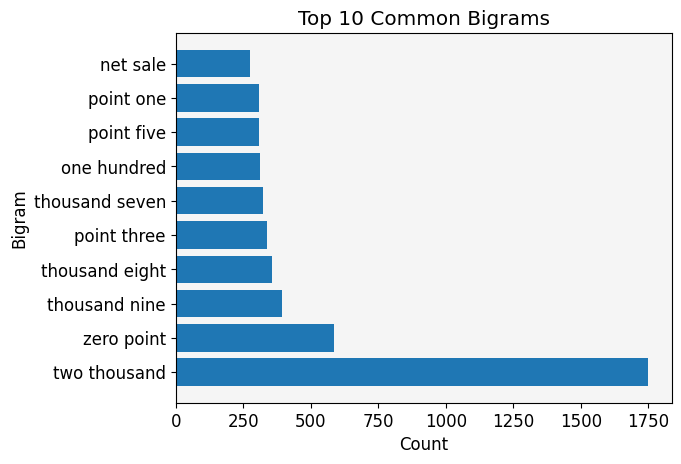

In [ ]:
# Create a CountVectorizer object to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each bigram
bigram_counts = X.sum(axis=0)

# Get the top 10 bigrams and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 bigrams and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.title("Top 10 Common Bigrams")
plt.show()

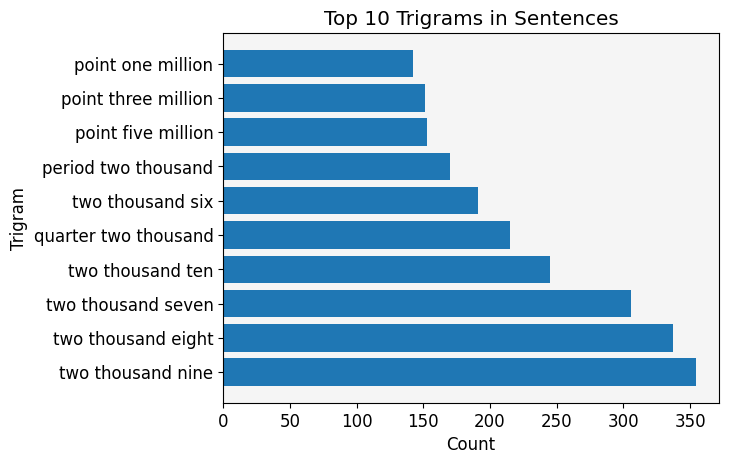

In [ ]:
# Create a CountVectorizer object to extract bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)

# Fit the vectorizer to the sentences in the DataFrame
X = vectorizer.fit_transform(df["Sentence"])

# Get the count of each bigram
bigram_counts = X.sum(axis=0)

# Get the top 10 trigrams and their counts
top_bigrams = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(top_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Create a bar chart of the top 10 trigrams and their counts
plt.barh([i for i in range(10)], [bigram[1] for bigram in top_bigrams], tick_label=[bigram[0] for bigram in top_bigrams])
plt.xlabel("Count")
plt.ylabel("Trigram")
plt.title("Top 10 Trigrams in Sentences")
plt.show()

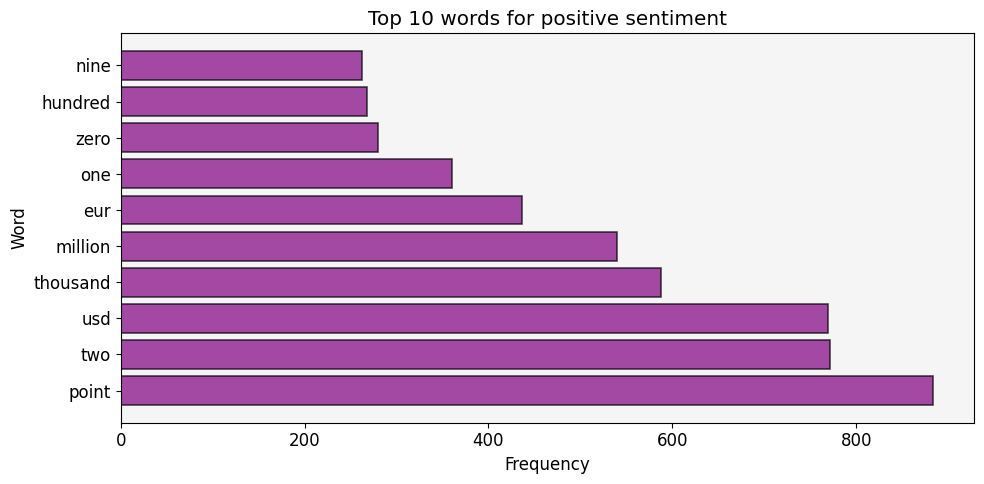

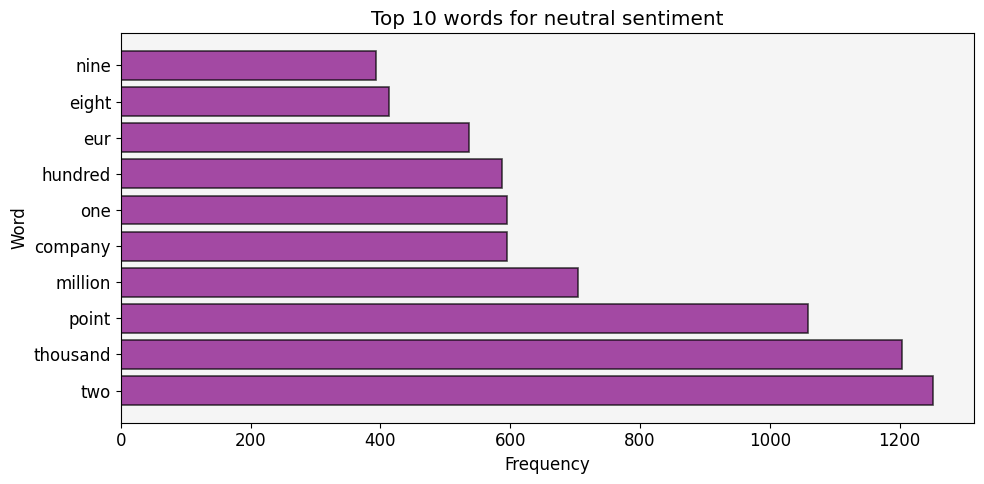

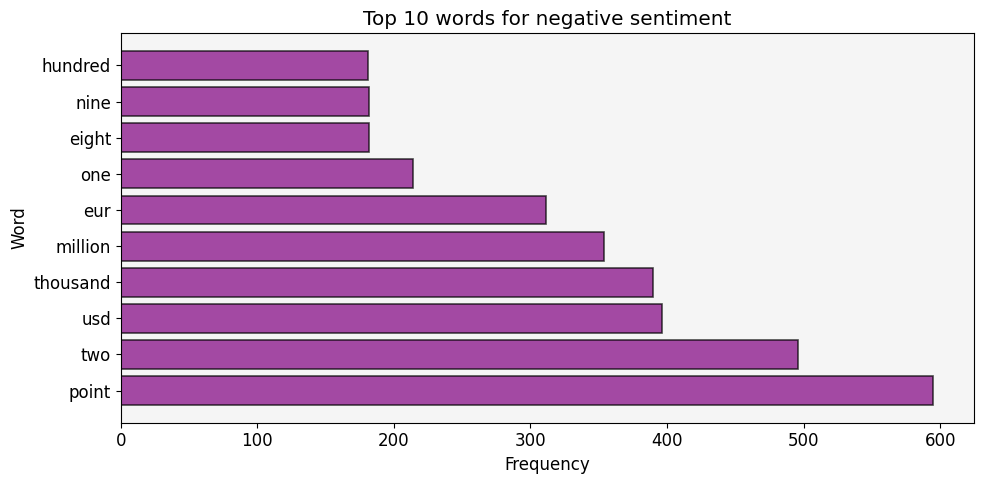

In [ ]:
# Create a dictionary to store the top 10 words for each sentiment category
top_words = {'positive': [], 'neutral': [], 'negative': []}

# Extract the top 10 words for each sentiment category
for sentiment in top_words:
    # Combine all sentences with the same sentiment into one string
    sentences_sentiment = ' '.join(df.loc[df['Sentiment'] == sentiment, 'Sentence'].tolist())
    # Tokenize the sentences
    tokens = nltk.word_tokenize(sentences_sentiment)
    
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # Calculate the frequency of each token
    freq_dist = nltk.FreqDist(tokens)
    # Add the top 10 tokens to the dictionary
    top_words[sentiment] = freq_dist.most_common(10)

# Create a bar chart of the top 10 words for each sentiment category
for sentiment in top_words:
    plt.figure(figsize=(10, 5))
    plt.title(f'Top 10 words for {sentiment} sentiment')
    plt.barh([pair[0] for pair in top_words[sentiment]], [pair[1] for pair in top_words[sentiment]], color='purple', edgecolor='black', linewidth=1.2, alpha=0.7)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

In [ ]:
df.columns

Index(['Sentence', 'Sentiment', 'label', 'Length', 'Word Counts'], dtype='object')

<ipython-input-49-d52d074e6d55>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset_df.corr()


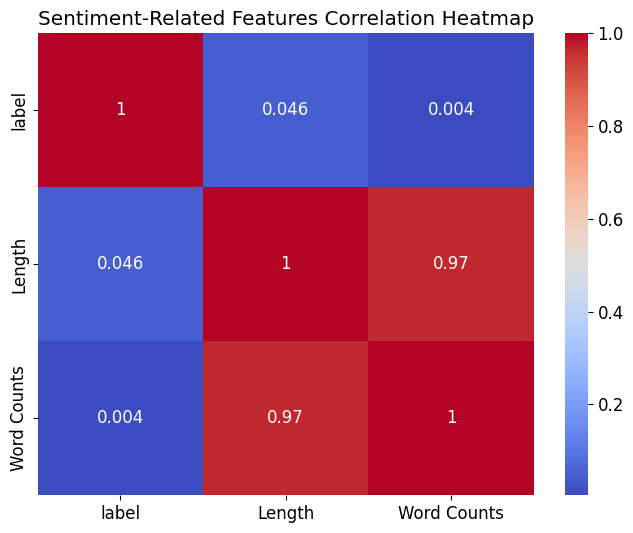

In [ ]:
#Create a subset_df for selected columns
subset_df = df[['Sentence', 'Sentiment', 'label', 'Length', 'Word Counts']]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sentiment-Related Features Correlation Heatmap")
plt.show()